<h1 align='center'> SMC - TD3 </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>
<h3> Box-Muller et Box-Muller Amélioré  </h3>

In [50]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

Soit $(U, V)$ uniformément distribués sur $[0, 1]$ montrons que $X, Y = g(U, V)$ suit $\mathcal{N}(0, I_2)$ avec $g$:
 On a:
$$ \begin{pmatrix} X \\ Y \end{pmatrix} 
= g \left( \begin{pmatrix} U \\ V \end{pmatrix} \right)
= \begin{pmatrix} g_1(U,V) \\ g_2(U,V) \end{pmatrix}
$$
Où
$$\begin{array}{ccccc}
g_1 & : & ]0,1]^2 & \to & \mathbb{R} \\
 & & (x,y) & \mapsto & \sqrt{-2 \ln(x)} \cos(2\pi y) \\
\end{array} 
$$
et
$$\begin{array}{ccccc}
g_2 & : & ]0,1]^2 & \to & \mathbb{R} \\
 & & (x,y) & \mapsto & \sqrt{-2 \ln(x)} \sin(2\pi y) \\
\end{array} 
$$
On peut facilement montrer que g est bijective (prendre la somme des carrés pour éliminer $cos^2 + sin^2$), de Classe $C^1$ sur son domaine de définition et son Jacbien est non nul, donc:
$$ f_{X,Y}(X,Y) = \left| \frac{1}{\text{Jac}(g)(X,Y)} \right| 
\iota_{g\left(]0,1]^2\right)}(X,Y)
$$
En effet, le jacobien de $g$: :
\begin{align*}
\text{Jac}(g)(U,V)
&= \begin{vmatrix}
\frac{\partial g_1}{\partial U}(U,V) & \frac{\partial g_1}{\partial V}(U,V) \\
\frac{\partial g_2}{\partial U}(U,V) & \frac{\partial g_2}{\partial V}(U,V)
\end{vmatrix}
\\
&= \begin{vmatrix}
\frac{-\cos(2\pi V)}{U \sqrt{-2\ln(U)}} &  \sqrt{-2\ln(U)}(-2\pi\sin(2\pi V)) \\
\frac{-\sin(2\pi V)}{U \sqrt{-2\ln(U)}} & \sqrt{-2\ln(U)}(2\pi\cos(2\pi V))
\end{vmatrix}
\\
&= \left| -\frac{2\pi}{U}\cos^2(2\pi V) -\frac{2\pi}{U}\sin^2(2\pi V) \right| \\
\text{Jac}(g)(U,V)
&= \frac{2\pi}{U} \neq 0
\end{align*}

Et puisque $X^2 + Y^2 = -2\ln(U)$, on a $U = \exp\left(-\frac{X^2+Y^2}{2}\right)$. Ainsi :
$$ \text{Jac}(g)(X,Y) = \text{Jac}(g)(g^{-1}(U,V)) = 
\frac{2\pi}{\exp\left(-\frac{X^2+Y^2}{2}\right)}
$$

La densité de $(X,Y)$ est :
$$ f_{X,Y}(X,Y) = \frac{1}{2\pi} \exp\left(-\frac{X^2+Y^2}{2}\right)
$$

donc $ (X,Y) \sim \mathcal{N}\left( \begin{pmatrix} 0 \\ 0\end{pmatrix},
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \right)$: $ X \perp Y$ et $ X,Y \sim \mathcal{N}(0,1)$.

Par ailleurs les coordonnées polaires de (X, Y) sont donnés par:
$R = \sqrt(X^2 + Y^2) = \sqrt(-2\ln(U))$
$ \theta 
= \arctan \frac{Y}{X}
= \arctan \frac{\sin(2\pi V)}{\cos(2\pi V)}
= \arctan \left(\tan(2\pi V)\right)
= 2\pi V
\sim \mathcal{U}_{]0,2\pi]}
$
Ce qui revient à simuler des var uniformes.

In [51]:
def box_muller(n, seed=None):
    """2D-Gaussian generator using box-muller algorithm.
    n: int.
        number of samples.
    seed: int (optional).
        random seed initialization.
    """
    # init generator
    rnd = np.random.RandomState(seed)
    
    # generate U and V
    # these two lines can be replaced by
    # U, V = rnd.rand(2, n)
    U = rnd.rand(n)
    V = rnd.rand(n)
    R = np.sqrt(- 2 * np.log(U))
    X, Y = R * np.cos(2 * np.pi * V), R * np.sin(2 * np.pi * V)
    
    return X, Y

La version améliorée consiste à générer d'abord le rayon R comme la distance à l'origine de (u, v) $\sim U(-1, 1)$ et en déduire les coordonnées polaires. 

1. Montrez qu'avec la condition de rejet, $S = U^2 + V^2$ suit une uniforme 0-1.
2. Montrez que S est indépendante de U / V. Puis que X est independante de Y.
3. En utilisant les coordonnées polaires, montrez que X, Y suit $N(0, I_2)$

In [52]:
def box_muller_ameliore(n, seed=None):
    """2D-Gaussian generator using a cosine-free box-muller algorithm.
    n: int.
        number of samples.
    seed: int (optional).
        random seed initialization.
    """
    # init generator
    rnd = np.random.RandomState(seed)
    
    # generate U and V
    U, V = np.zeros((2, n))
    for i in range(n):
        while(True):
            u = 2 * rnd.rand() - 1
            v = 2 * rnd.rand() - 1
            # if within l2 ball
            if u ** 2 + v ** 2 <= 1.:
                U[i], V[i] = u, v
                break
    S = U ** 2 + V ** 2
    R = np.sqrt(- 2 * np.log(S) / S)
    X, Y = R * U, R * V
    
    return X, Y

In [53]:
X0, Y0 = box_muller(10000, seed=0)

In [54]:
X, Y = box_muller_ameliore(10000, seed=0)

Let's visualize histograms:

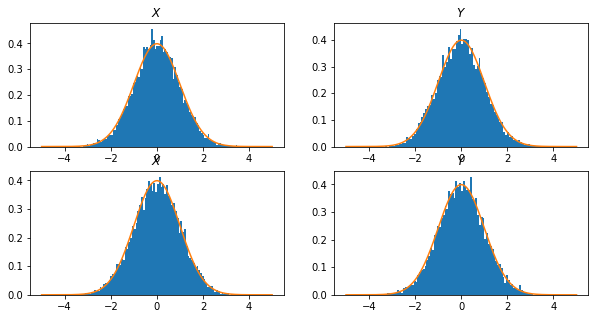

In [55]:
grid = np.linspace(-5, 5, 1000)
densite = 1 / np.sqrt(2 * np.pi) * np.exp(- grid ** 2 / 2)
f, axes = plt.subplots(2, 2, figsize=(10, 5))
for ax, data, label in zip(axes.flatten(), (X, Y, X0, Y0), [r"$X$", r"$Y$", r"$X$", r"$Y$"]):
    ax.hist(data, bins=100, normed=True)
    ax.plot(grid, densite)
    ax.set_title(label)
plt.show()

How about the estimated covariance matrix ?

In [56]:
np.cov(X, Y)

array([[0.97200076, 0.00487768],
       [0.00487768, 0.98996234]])

In [57]:
np.cov(X0, Y0)

array([[ 1.03410058, -0.00857912],
       [-0.00857912,  1.00262533]])

Now compare both box muller methods: 

In [58]:
%timeit box_muller(10000, 0)

615 µs ± 6.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
%timeit box_muller_ameliore(10000, 0)

15.3 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Acceptance rate is $\pi / 4$:

In [60]:
np.pi / 4

0.7853981633974483